In [130]:
a = 'hola'
b = 'adios'
'{a}'.format()

KeyError: 'a'

In [107]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

import joblib
import os

def _my_scorer():
    """
    Placeholder to call XGB grid
    """
    return

In [123]:
def plot_parameters(save_folder, grid_path):
    grid = joblib.load(grid_path)
    grid_results = pd.DataFrame(grid.cv_results_)
    params_columns = grid_results.columns.to_numpy(str)[np.char.startswith(grid_results.columns.to_numpy(str), 'param_')]
    print(grid.best_params_)
    for param in params_columns:
        plt.figure(figsize=(15,10))
        sns.boxplot(data=grid_results, x=param, y='mean_test_score')
        plt.xlabel('')
        plt.ylabel('')
        plt.savefig('{}/{}_{}.png'.format(save_folder, name, param), bbox_inches='tight', dpi=300, transparent=True)

In [124]:
model_names = ['XGBB', 'LR', 'RF']
grid_paths = ['./results/XGBoost/GridSearchCV_22-03-22_03-27-03/GridSearchCV_22-03-22_03-27-03.pkl', 
              './results/modeling/LR_grid.pkl', 
              './results/modeling/RF_grid.pkl']

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 700, 'scale_pos_weight': 5.0}
{'C': 1000, 'penalty': 'l1'}
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}


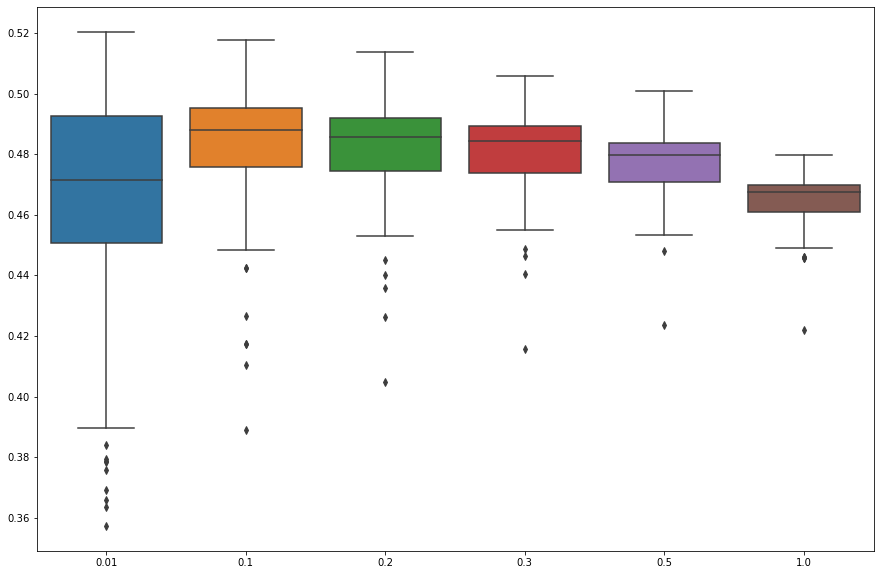

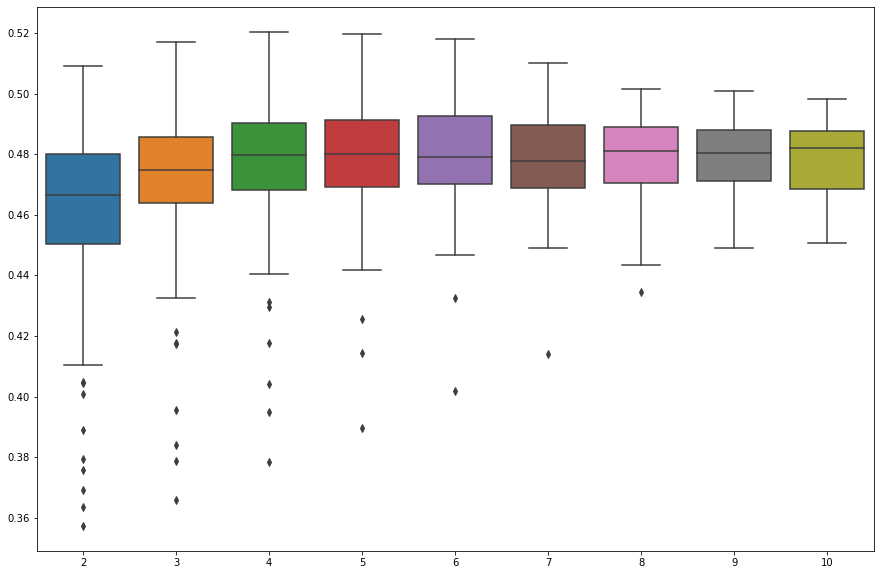

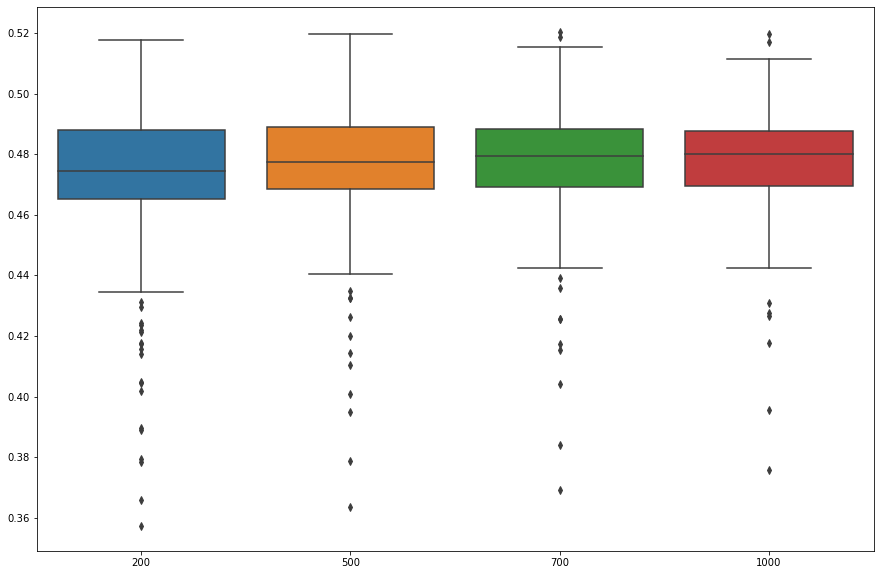

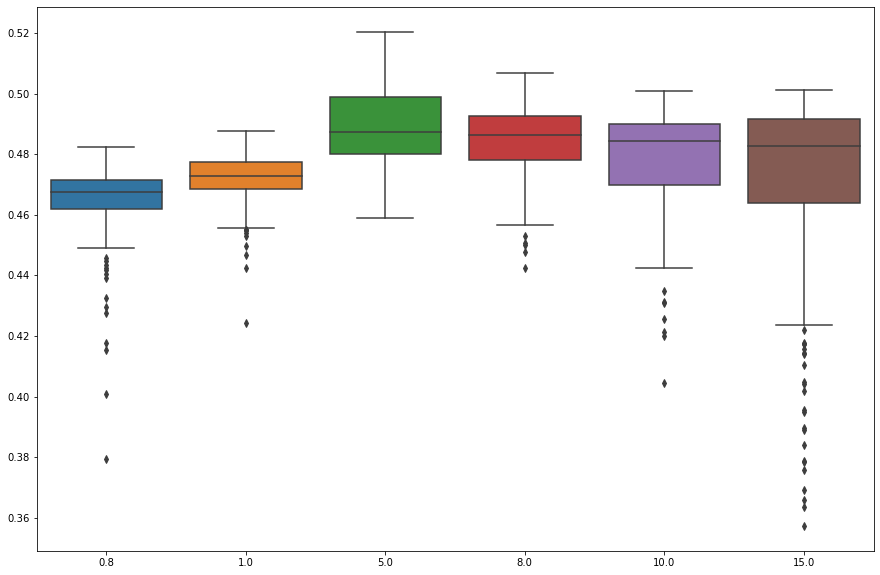

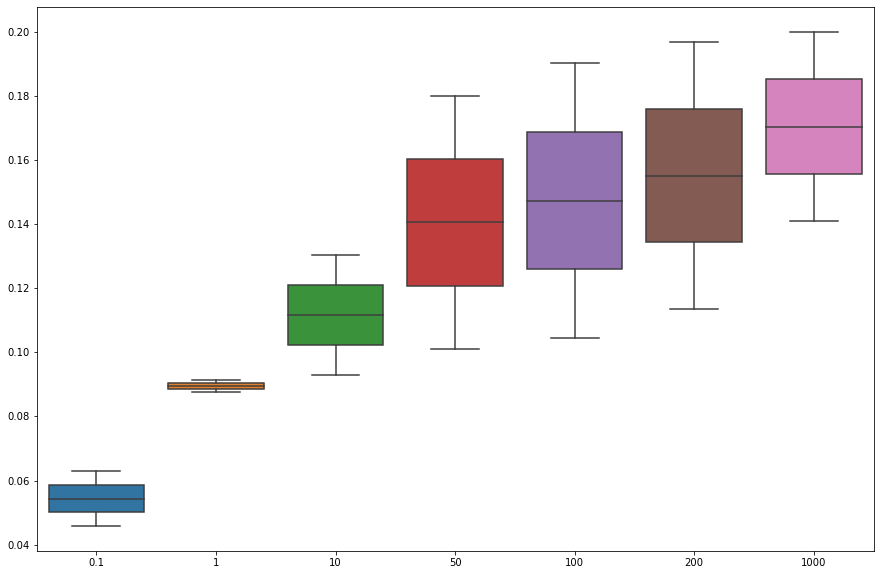

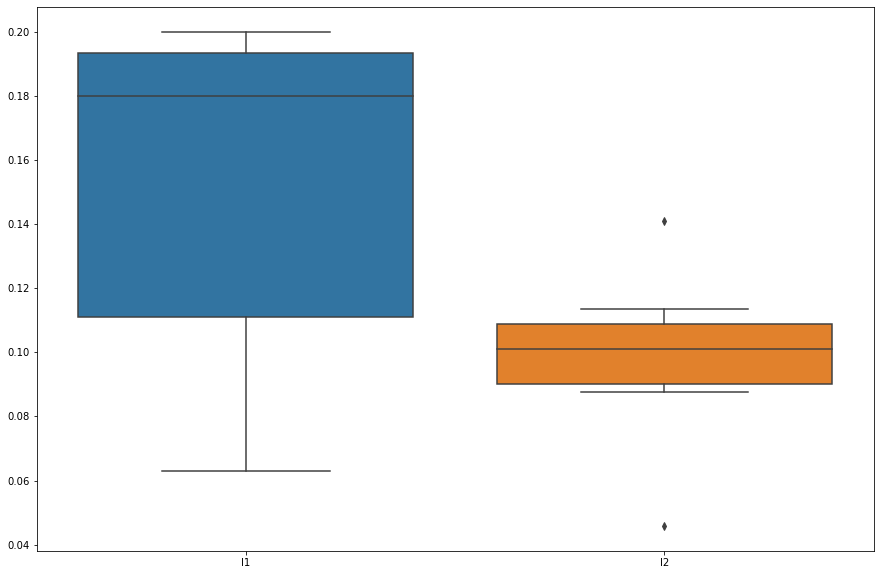

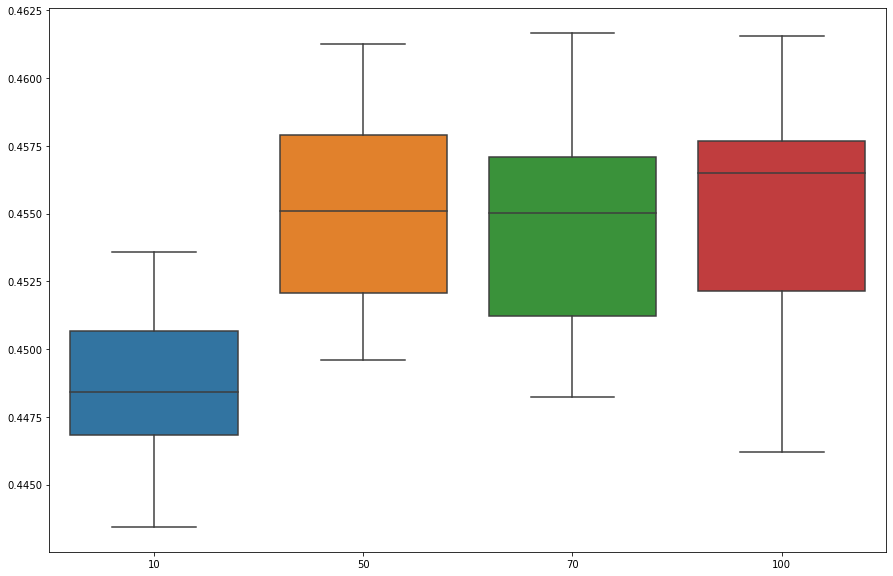

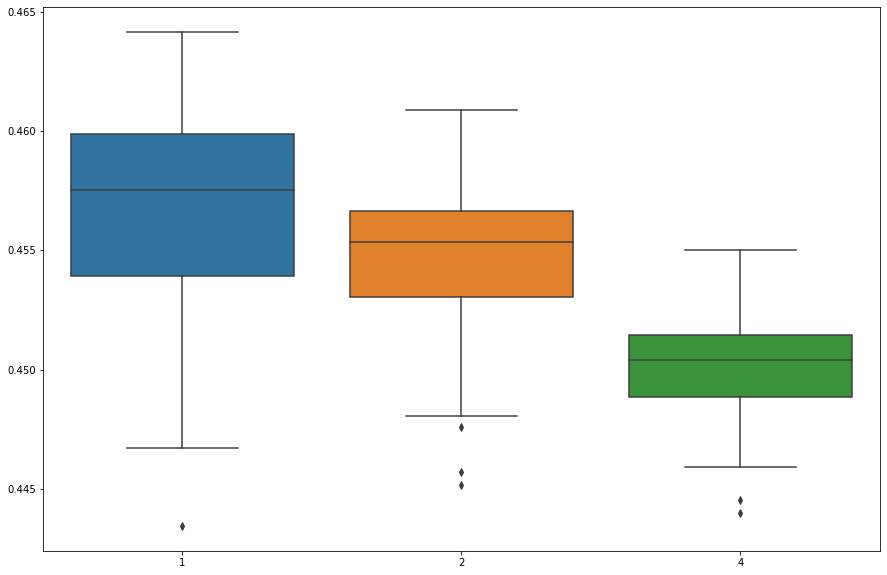

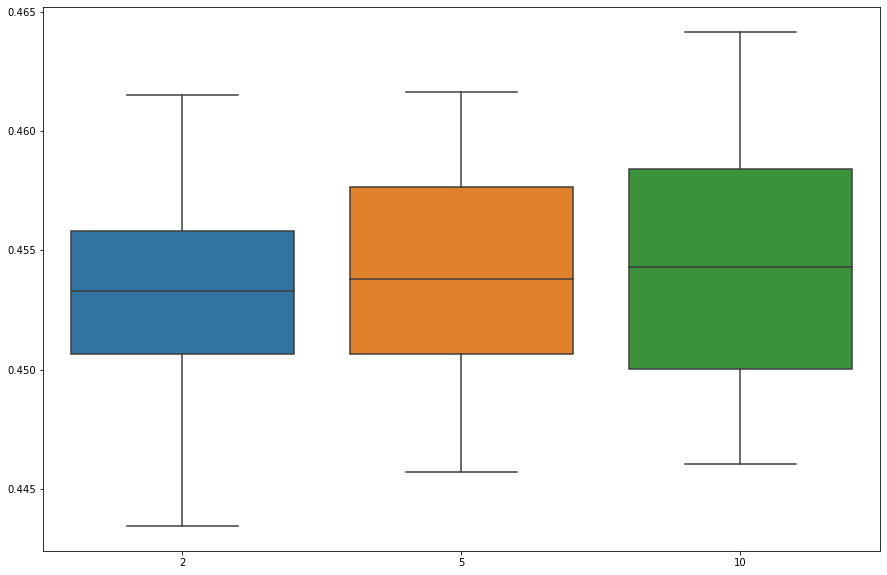

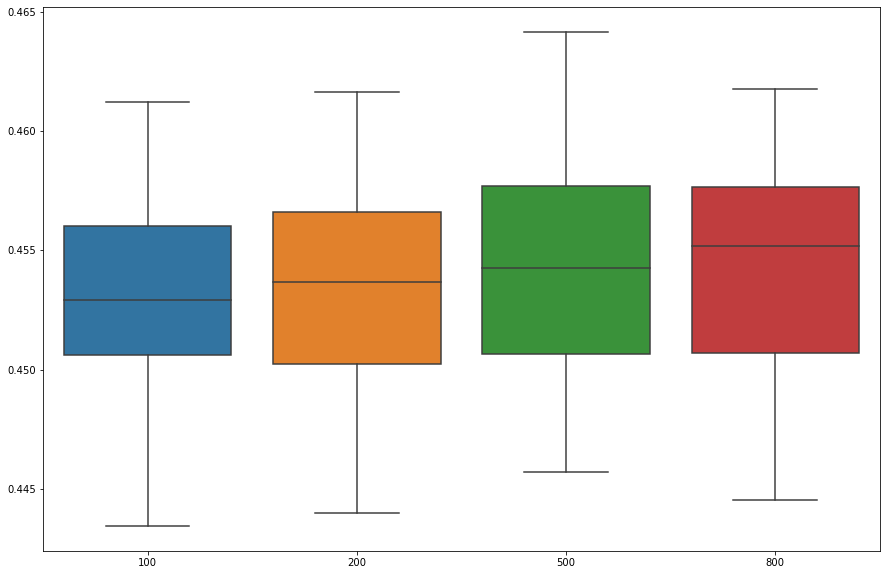

In [127]:
for grid_path, name in list(zip(grid_paths, model_names)):
    save_folder = './results/figures/{}_Params'.format(name)
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    plot_parameters(save_folder, grid_path)